# House Price Prediction Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore')

# Exploring Dataset

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head(10)

,Availability,Location,Room,Society,Area,Bathroom,Balcony,Price
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df1.describe()

,Bathroom,Balcony,Price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
df1.shape

(13320, 8)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Availability  13320 non-null  object 
 1   Location      13319 non-null  object 
 2   Room          13304 non-null  object 
 3   Society       7818 non-null   object 
 4   Area          13320 non-null  object 
 5   Bathroom      13247 non-null  float64
 6   Balcony       12711 non-null  float64
 7   Price         13320 non-null  float64
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


# Data Cleaning

In [6]:
df2 = df1.drop(["Society","Balcony","Availability"],axis = 1)

In [7]:
df2.head()

,Location,Room,Area,Bathroom,Price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

Location     1
Room        16
Area         0
Bathroom    73
Price        0
dtype: int64

In [9]:
import math
median = math.floor(df2.Bathroom.median())
median

2

In [10]:
df2.bath = df2.Bathroom.fillna(median,inplace=True)
df2.head()

,Location,Room,Area,Bathroom,Price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df3 = df2

In [12]:
df3.isnull().sum()

Location     1
Room        16
Area         0
Bathroom     0
Price        0
dtype: int64

In [13]:
df3.Area.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3["Area"].apply(is_float)].head()

,Location,Room,Area,Bathroom,Price
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df4 = df3
df4["Area"] = df4["Area"].apply(convert_sqft_to_num)

In [18]:
df4.head(31)

,Location,Room,Area,Bathroom,Price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00
5,Whitefield,2 BHK,1170.0,2.0,38.00
6,Old Airport Road,4 BHK,2732.0,4.0,204.00
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00
8,Marathahalli,3 BHK,1310.0,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00


In [19]:
df5 = df4.dropna()

In [20]:
df5.isnull().sum()

Location    0
Room        0
Area        0
Bathroom    0
Price       0
dtype: int64

In [21]:
df5.shape

(13257, 5)

# Feature Engineering

In [22]:
df5["Room"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [23]:
df5["Bhk"] = df3["Room"].apply(lambda x: int(x.split(" ")[0]) if isinstance(x, str) and " " in x else None)

In [24]:
df5.head(3)

,Location,Room,Area,Bathroom,Price,Bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0


In [25]:
df6 = df5
df6["Price_per_sqft"] = df6["Price"]*100000/df5["Area"]
df6.head()

,Location,Room,Area,Bathroom,Price,Bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


# Dimensionality Reduction

In [26]:
len(df6.Location.unique())

1298

In [27]:
df6["Location"] = df6["Location"].apply(lambda x: x.strip() if isinstance(x, str) else None)
Location_stats = df6.groupby("Location")["Location"].agg("count").sort_values(ascending = False)
Location_stats

Location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: Location, Length: 1287, dtype: int64

In [28]:
df6.isnull().sum()

Location          0
Room              0
Area              0
Bathroom          0
Price             0
Bhk               0
Price_per_sqft    0
dtype: int64

In [29]:
len(Location_stats[Location_stats<=10])

1047

In [30]:
Location_stats_less_than_10 = Location_stats[Location_stats<=10]
Location_stats_less_than_10

Location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: Location, Length: 1047, dtype: int64

In [31]:
df6.Location = df6.Location.apply(lambda x: "other" if x in Location_stats_less_than_10 else x)
len(df6.Location.unique())

241

In [32]:
df6.shape

(13257, 7)

In [33]:
df6.head(10)

,Location,Room,Area,Bathroom,Price,Bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6.0,36274.509804


# Outlier Removal

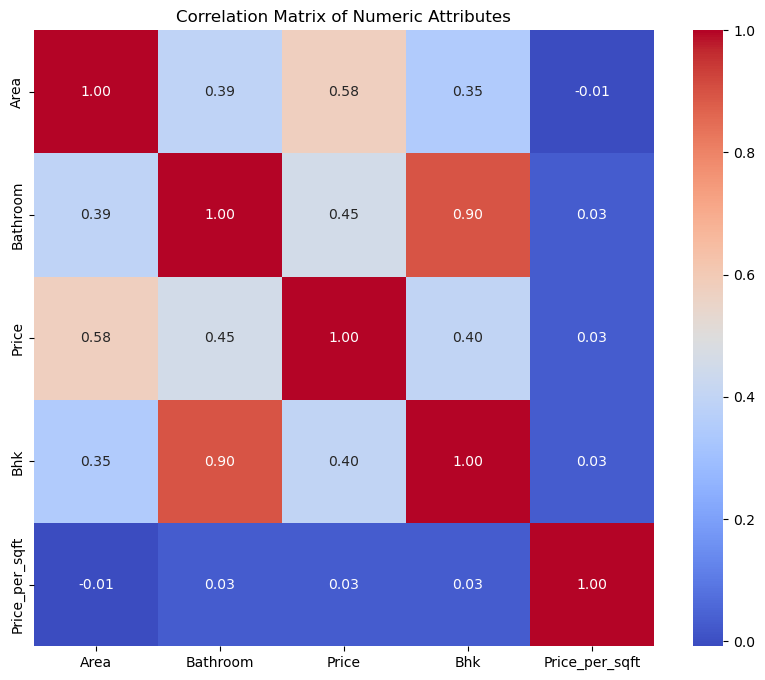

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with mixed data types
# Create a DataFrame with only numeric columns
numeric_df = df6.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Attributes')
plt.show()


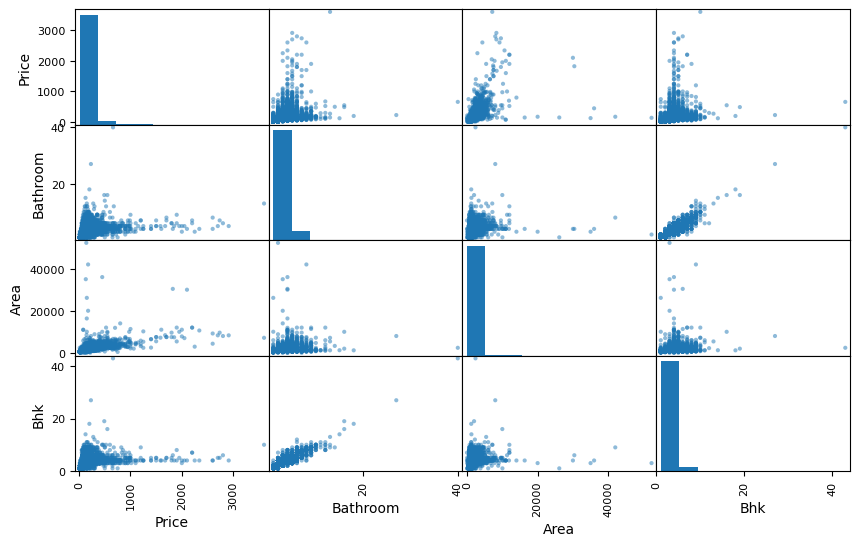

In [35]:
from pandas.plotting import scatter_matrix
attributes = ["Price", "Bathroom", "Area", "Bhk",]
scatter_matrix(df6[attributes], figsize = (10,6))
plt.savefig('scatter_matrix.png')

In [36]:
# plt.savefig('correlation_heatmap.png')

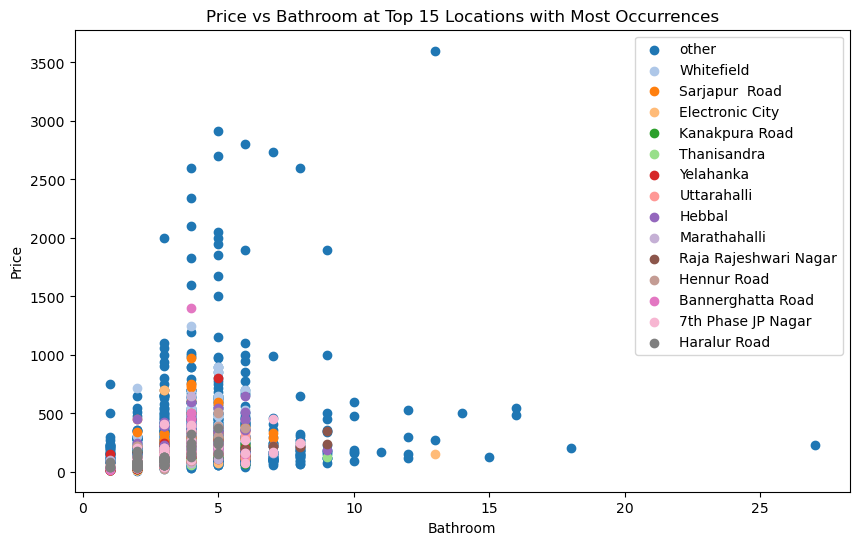

In [37]:
import seaborn as sns

top_locations = df6['Location'].value_counts().nlargest(15).index

colors = sns.color_palette("tab20", len(top_locations))

plt.figure(figsize=(10, 6))

for i, location in enumerate(top_locations):
    plt.scatter(df6[df6['Location'] == location]['Bathroom'], 
                df6[df6['Location'] == location]['Price'], 
                label=location, 
                alpha=1.0,
                color=colors[i])

plt.title('Price vs Bathroom at Top 15 Locations with Most Occurrences')
plt.xlabel('Bathroom')
plt.ylabel('Price')
plt.legend()
# plt.grid(True)
plt.show()


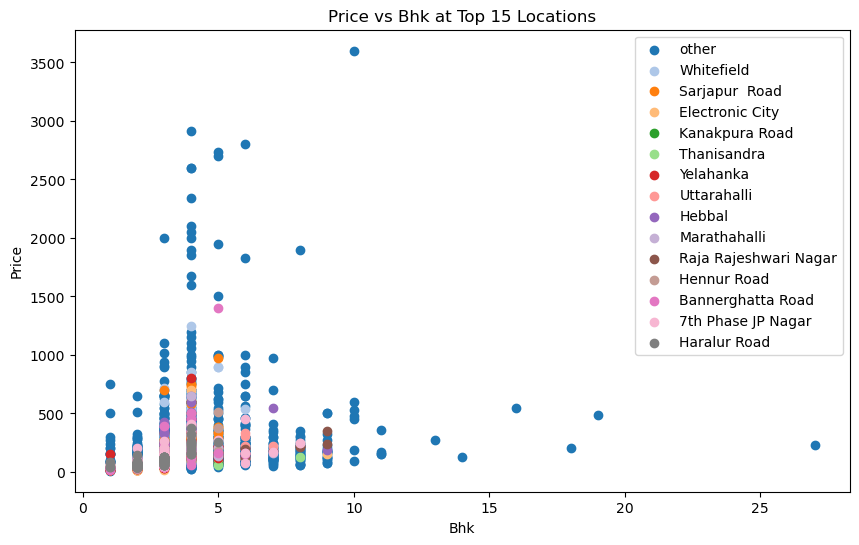

In [38]:
import seaborn as sns

top_locations = df6['Location'].value_counts().nlargest(15).index

colors = sns.color_palette("tab20", len(top_locations))

plt.figure(figsize=(10, 6))

for i, location in enumerate(top_locations):
    plt.scatter(df6[df6['Location'] == location]['Bhk'], 
                df6[df6['Location'] == location]['Price'], 
                label=location, 
                alpha=1.0,
                color=colors[i])

plt.title('Price vs Bhk at Top 15 Locations')
plt.xlabel('Bhk')
plt.ylabel('Price')
plt.legend()
# plt.grid(True)
plt.show()


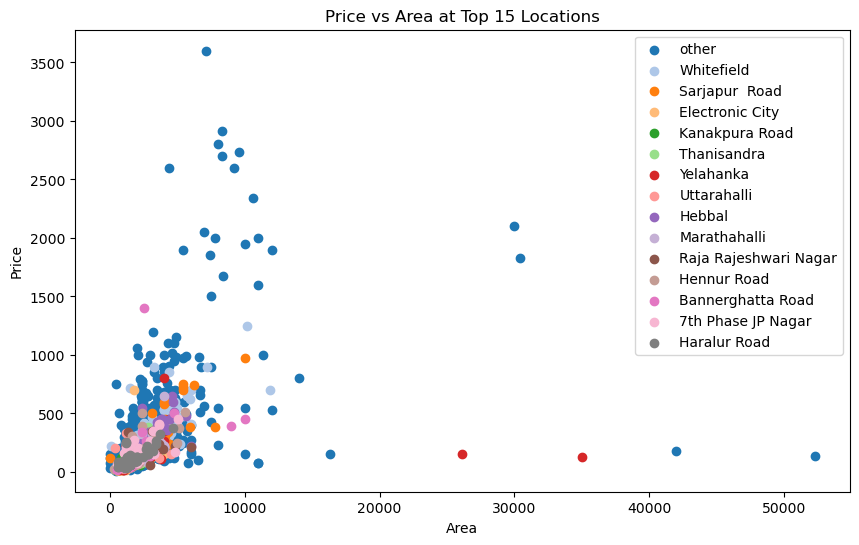

In [39]:
import seaborn as sns

top_locations = df6['Location'].value_counts().nlargest(15).index

colors = sns.color_palette("tab20", len(top_locations))

plt.figure(figsize=(10, 6))

for i, location in enumerate(top_locations):
    plt.scatter(df6[df6['Location'] == location]['Area'], 
                df6[df6['Location'] == location]['Price'], 
                label=location, 
                alpha=1.0,
                color=colors[i])

plt.title('Price vs Area at Top 15 Locations')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
# plt.grid(True)
plt.show()


### Outlier removal using Business logic

In [40]:
df6[df6.Area/df6.Bhk<300].head()

,Location,Room,Area,Bathroom,Price,Bhk,Price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [41]:
df7  = df6[~(df6.Area/df6.Bhk<300)]
df7.shape

(12513, 7)

### Outlier Removal Using Standard Deviation and Mean

In [42]:
df7.Price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [43]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) 
                           & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [44]:
df8 = remove_pps_outliers(df7)
df8.shape

(10288, 7)

In [45]:
df8.Price_per_sqft.describe()

count    10288.000000
mean      5660.832340
std       2266.862393
min       1250.000000
25%       4250.000000
50%       5176.470588
75%       6428.571429
max      24509.803922
Name: Price_per_sqft, dtype: float64

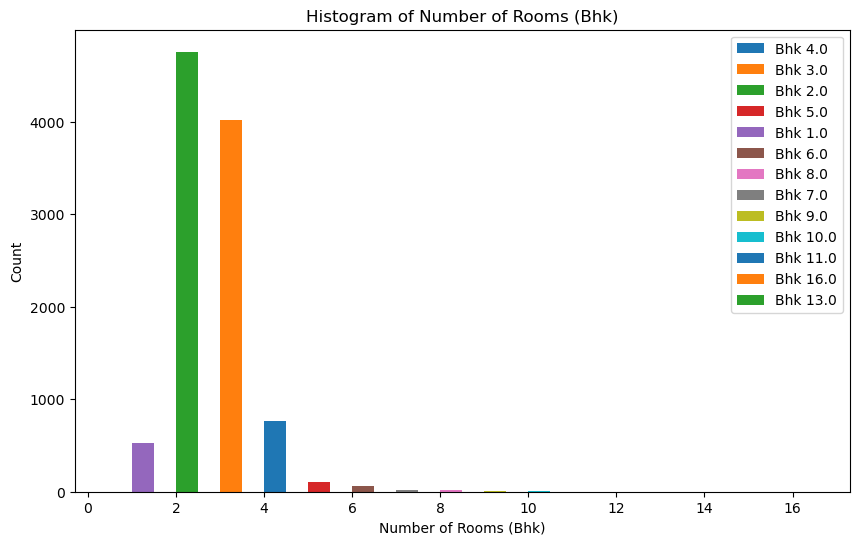

In [46]:
unique_bhk_values = df8['Bhk'].unique()

colors = sns.color_palette("tab10", len(unique_bhk_values))

plt.figure(figsize=(10, 6))
for i, bhk in enumerate(unique_bhk_values):
    plt.hist(df8[df8['Bhk'] == bhk]['Bhk'], bins=20, color=colors[i], alpha=1.0, label=f'Bhk {bhk}',width= 0.5)

plt.title('Histogram of Number of Rooms (Bhk)')
plt.xlabel('Number of Rooms (Bhk)')
plt.ylabel('Count')
plt.legend()
# plt.grid(True)
plt.show()

In [47]:
df8.groupby("Bhk")["Bhk"].agg("count").sort_values(ascending = False)

Bhk
2.0     4754
3.0     4021
4.0      764
1.0      526
5.0      110
6.0       62
7.0       20
8.0       16
9.0        8
10.0       3
11.0       2
13.0       1
16.0       1
Name: Bhk, dtype: int64

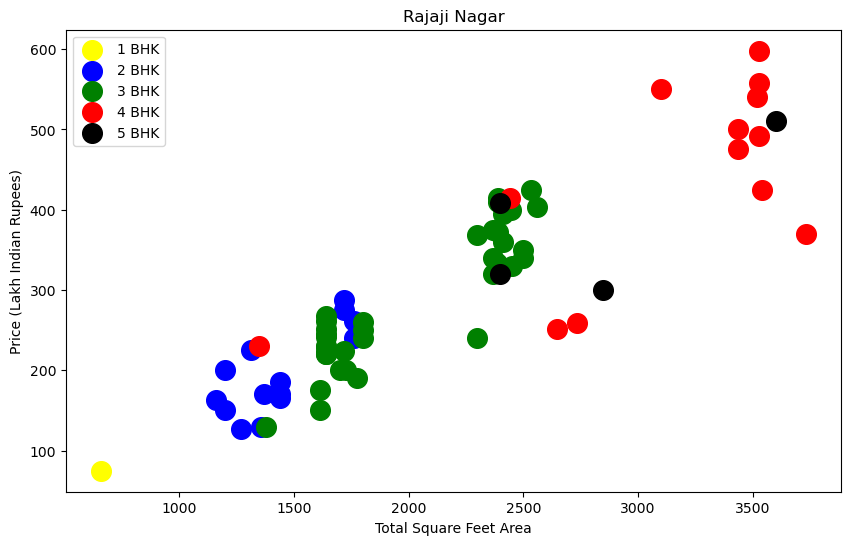

In [48]:
def plot_scatter_chart(df,Location):
    Bhk1 = df[(df.Location==Location) & (df.Bhk==1)]
    Bhk2 = df[(df.Location==Location) & (df.Bhk==2)]
    Bhk3 = df[(df.Location==Location) & (df.Bhk==3)]
    Bhk4 = df[(df.Location==Location) & (df.Bhk==4)]
    Bhk5 = df[(df.Location==Location) & (df.Bhk==5)]
    matplotlib.rcParams['figure.figsize'] = (10,6)
    plt.scatter(Bhk1.Area,Bhk1.Price,color='yellow',label='1 BHK', s=200)
    plt.scatter(Bhk2.Area,Bhk2.Price,color='blue',label='2 BHK', s=200)
    plt.scatter(Bhk3.Area,Bhk3.Price, color='green',label='3 BHK', s=200)
    plt.scatter(Bhk4.Area,Bhk4.Price,color='Red',label='4 BHK', s=200)
    plt.scatter(Bhk5.Area,Bhk5.Price, color='black',label='5 BHK', s=200)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(Location)
    plt.legend()
    
plot_scatter_chart(df8,"Rajaji Nagar")


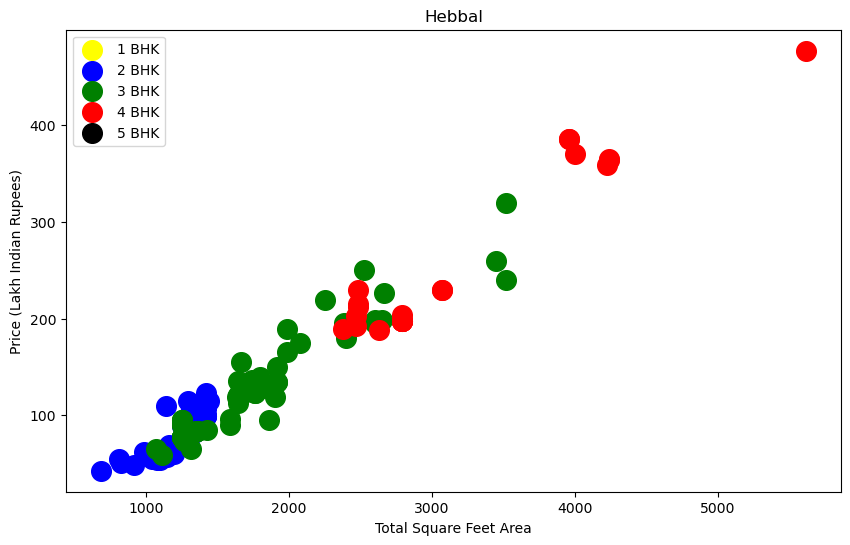

In [49]:
plot_scatter_chart(df8,"Hebbal")

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for Location, Location_df in df.groupby('Location'):
        Bhk_stats = {}
        for Bhk, Bhk_df in Location_df.groupby('Bhk'):
            Bhk_stats[Bhk] = {
                'mean': np.mean(Bhk_df.Price_per_sqft),
                'std': np.std(Bhk_df.Price_per_sqft),
                'count': Bhk_df.shape[0]
            }
        for Bhk, Bhk_df in Location_df.groupby('Bhk'):
            stats = Bhk_stats.get(Bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, Bhk_df[Bhk_df.Price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [51]:
df9 = remove_bhk_outliers(df8)
df9.shape

(7342, 7)

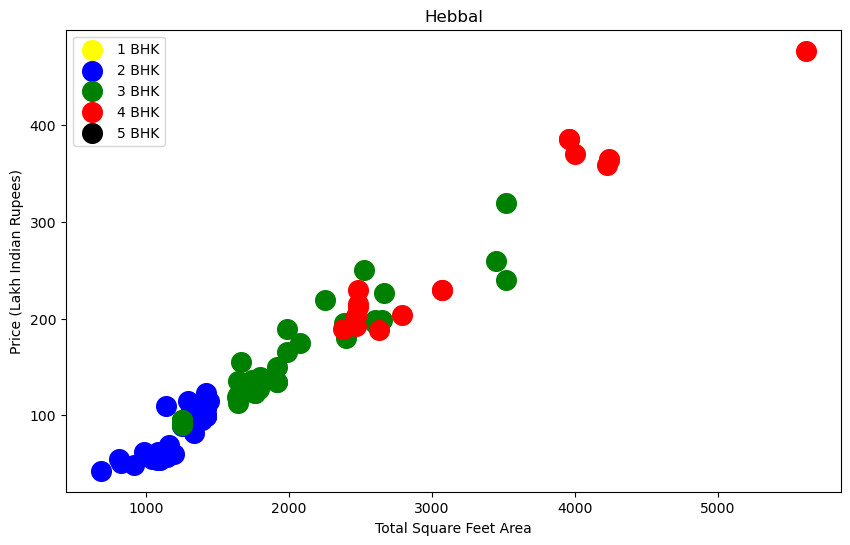

In [52]:
plot_scatter_chart(df9,"Hebbal")

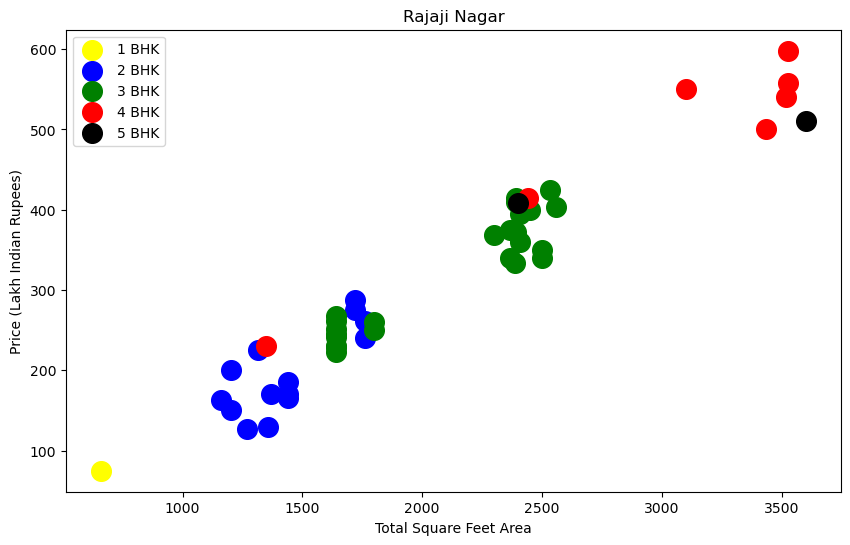

In [53]:
plot_scatter_chart(df9,"Rajaji Nagar")

### Outlier Removal Using Bathrooms Feature

Text(0, 0.5, 'Count')

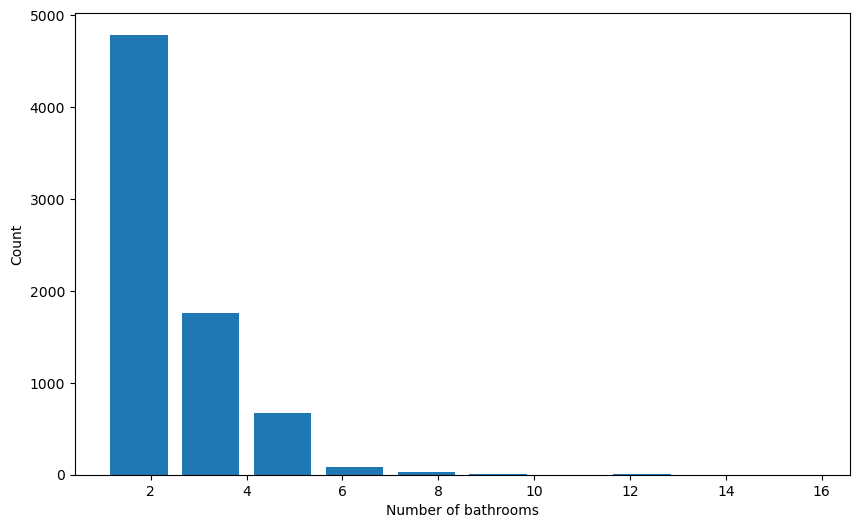

In [54]:
plt.hist(df9.Bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [55]:
 df9[df9.Bathroom>10]

,Location,Room,Area,Bathroom,Price,Bhk,Price_per_sqft
5306,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8527,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8616,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9351,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9682,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


In [56]:
df9[df9.Bathroom>df9.Bhk+2]

,Location,Room,Area,Bathroom,Price,Bhk,Price_per_sqft
1634,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5267,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
6748,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
8452,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [57]:
df10 = df9[df9.Bathroom<df9.Bhk+2]
df10.head()

,Location,Room,Area,Bathroom,Price,Bhk,Price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2.0,11983.805668


In [58]:
df10.head()

,Location,Room,Area,Bathroom,Price,Bhk,Price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2.0,11983.805668


In [59]:
df11 = df10.drop(['Room','Price_per_sqft'],axis='columns')
df11.head()

,Location,Area,Bathroom,Price,Bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0


In [60]:
dummies = pd.get_dummies(df11.Location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
df12 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head()

,Location,Area,Bathroom,Price,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
df13 = df12.drop('Location',axis='columns')
df13.head(2)

,Area,Bathroom,Price,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
X = df13.drop(['Price'],axis='columns')
X.head(3)

,Area,Bathroom,Bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
y = df13.Price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: Price, dtype: float64

# Model Building

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(f"Rows in train set: {len(X_train)}\nRows in test set: {len(X_test)}\n")

Rows in train set: 5811
Rows in test set: 1453



In [66]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
lr_reg.score(X_test,y_test)

0.8581823360814392

In [67]:
from sklearn.metrics import mean_squared_error
# Make predictions on the test data
y_pred = lr_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 815.728989520123
Root Mean Squared Error (RMSE): 28.5609696880222


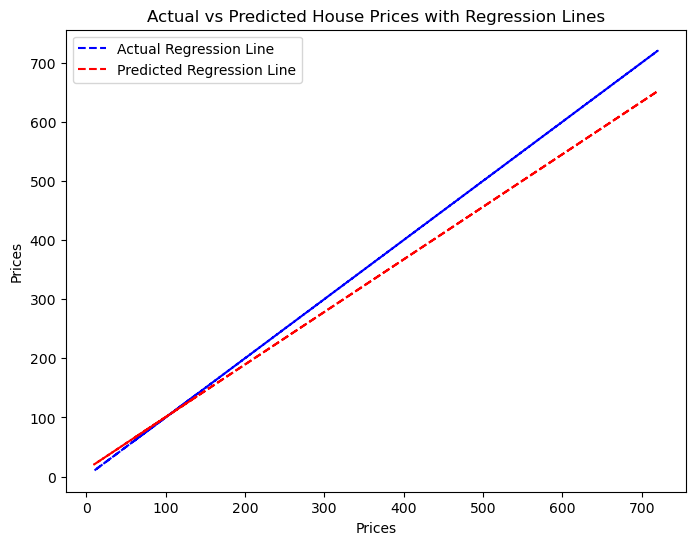

In [68]:
y_pred = lr_reg.predict(X_test)
# Fit a linear regression line to the actual prices
actual_regression_line = np.polyfit(y_test, y_test, 1)
actual_line_function = np.poly1d(actual_regression_line)

# Fit a linear regression line to the predicted prices
predicted_regression_line = np.polyfit(y_test, y_pred, 1)
predicted_line_function = np.poly1d(predicted_regression_line)
# Create a scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))

# Plot actual prices
# plt.scatter(y_test, y_test, color='blue', label='Actual Prices')

# Plot the regression line for actual prices
plt.plot(y_test, actual_line_function(y_test), color='blue', linestyle='--', label='Actual Regression Line')

# Plot predicted prices
# plt.scatter(y_test, y_pred, color='red', label='Predicted Prices')

# Plot the regression line for predicted prices
plt.plot(y_test, predicted_line_function(y_test), color='red', linestyle='--', label='Predicted Regression Line')

plt.xlabel('Prices')
plt.ylabel('Prices')
plt.title('Actual vs Predicted House Prices with Regression Lines')
plt.legend()
plt.show()

In [69]:
from sklearn.linear_model import Ridge
Ridge_reg =Ridge(alpha=5 , max_iter=50, tol=0.1)
Ridge_reg.fit(X_train,y_train)
Ridge_reg.score(X_test,y_test)

0.8466792113551334

In [70]:
# Make predictions on the test data
y_pred = Ridge_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 881.8944589689918
Root Mean Squared Error (RMSE): 29.696707880992328


In [71]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.807928061489144

In [72]:
# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1104.7893752262412
Root Mean Squared Error (RMSE): 33.23837203032425


In [73]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)
dt_reg.score(X_test,y_test)

0.7759065505282924

In [74]:
# Make predictions on the test data
y_pred = dt_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1288.975703341214
Root Mean Squared Error (RMSE): 35.90230777180228


In [75]:
from sklearn.linear_model import Lasso
la_reg =Lasso(alpha=10 , max_iter=50, tol=0.2)
la_reg.fit(X_train,y_train)
la_reg.score(X_test,y_test)

0.7378342394244696

In [76]:
# Make predictions on the test data
y_pred = la_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1507.96596877988
Root Mean Squared Error (RMSE): 38.83253750117136


In [77]:
from sklearn.model_selection import KFold, cross_val_score


# Instantiate a Linear Regression model
lr_reg =  LinearRegression()

# Define the number of splits for KFold
n_splits = 5

# Instantiate a KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(lr_reg, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(scores))
print("Standard deviation of CV scores:", np.std(scores))


Cross-validation scores: [0.85588058 0.89146106 0.83799866 0.81671896 0.79922147]
Mean CV score: 0.8402561448030108
Standard deviation of CV scores: 0.031965624931692596


In [78]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression

# Create a ShuffleSplit cross-validation iterator
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Define the parameter grid for Linear Regression
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'positive': [True, False]  # Whether to restrict coefficients to be positive
}

# Instantiate the Linear Regression model
lr_model = LinearRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=cv, scoring='r2', n_jobs=-1)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best R^2 Score:", best_score)


Best Parameters: {'fit_intercept': False, 'positive': False}
Best R^2 Score: 0.8443418400058993


# Model testing

In [79]:
def predict_price(Location,Area,Bathroom,Bhk):    
    loc_index = np.where(X.columns==Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = Bathroom
    x[2] = Bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_reg.predict([x])[0]

In [80]:
# lr_reg.coef_

In [81]:
# lr_reg.intercept_

In [82]:
predict_price('Chikka Tirupathi',2600, 5, 4)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
predict_price('Whitefield',3453,4,5)

In [ ]:
predict_price('1st Block Jayanagar',1000, 2, 2)

# Export the tested model to a pickle file

In [ ]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_reg,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))